## Data Source
The dataset is taken from kaggle. The data description can be found from this link (https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data)

## Goal
The goal of this analysis is to create meaning out of the data and check for things like user preference, artist preference, etc.

In [1]:
import pandas as pd
import pandasql as pdsql
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

from IPython.display import display, clear_output

## Data Gathering

In [2]:
train_csv = '../Raw Data/train.csv'
songs_csv = '../Raw Data/songs.csv'
members_csv = '../Raw Data/members.csv'
song_extra_info_csv = '../Raw Data/song_extra_info.csv'

train_dataset = pd.read_csv(train_csv)
songs_dataset = pd.read_csv(songs_csv)
members_dataset = pd.read_csv(members_csv)
song_extra_info_dataset = pd.read_csv(song_extra_info_csv)

In [3]:
display(train_dataset.head())
display(songs_dataset.head())
display(members_dataset.head())
display(song_extra_info_dataset.head())

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


## Exploring songs

### Number of songs v/s length (in mins)

In [4]:
query = """
    select ROUND(CAST(song_length AS float) / 60000 + 0.5) as length, count(*) as total_songs
    from songs_dataset
    group by length
    order by length
"""
song_len_data = pdsql.sqldf(query)

In [5]:
display(song_len_data.head())
display(song_len_data.describe())

,length,total_songs
0,1.0,35579
1,2.0,117645
2,3.0,382291
3,4.0,795738
4,5.0,541461


,length,total_songs
count,137.000000,137.000000
mean,74.956204,16761.459854
std,49.290386,90033.197573
min,1.000000,1.000000
25%,35.000000,3.000000
50%,69.000000,25.000000
75%,109.000000,93.000000
max,203.000000,795738.000000


<AxesSubplot:xlabel='length', ylabel='total_songs'>

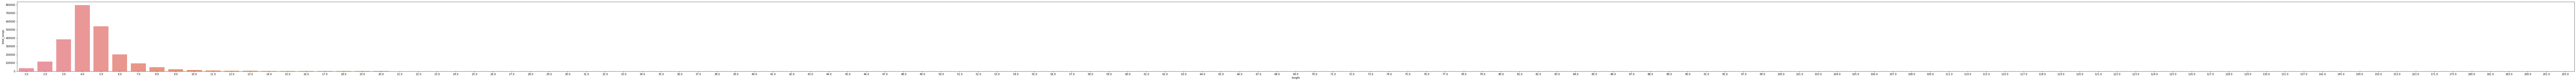

In [6]:
_, ax = plt.subplots(figsize=(180, 5))
sns.barplot(x='length', y='total_songs', data=song_len_data, ax=ax)

We can see that maximum songs have length between 3 - 4 minutes (which on average is true for the real world too)

### Genre Analysis

In [7]:
genre_dict = {}
for genre_ids in songs_dataset['genre_ids']:
    genres = str(genre_ids).split('|')
    for genre in genres:
        if genre_dict.get(genre, False):
            genre_dict[genre] += 1
        else:
            genre_dict[genre] = 1

In [8]:
genres = []
totals = []
for genre, val in genre_dict.items():
    genres.append(genre)
    totals.append(val)

In [9]:
song_genre_data = pd.DataFrame({'genre_id': genres, 'total_songs': totals})
song_genre_data = song_genre_data.sort_values('total_songs', ascending=False) 

In [10]:
display(song_genre_data.head())
display(song_genre_data.describe())

,genre_id,total_songs
0,465,589220
26,958,182836
12,1609,177258
18,2022,176531
19,2122,149608


,total_songs
count,192.000000
mean,13097.375000
std,50398.476986
min,1.000000
25%,121.250000
50%,796.500000
75%,5921.500000
max,589220.000000


<AxesSubplot:xlabel='genre_id', ylabel='total_songs'>

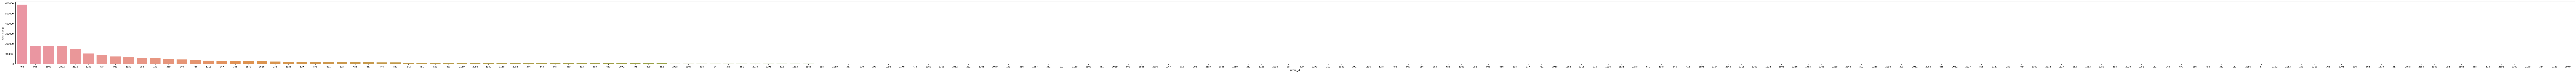

In [11]:
_, ax = plt.subplots(figsize=(200, 5))
sns.barplot(x='genre_id', y='total_songs', data=song_genre_data, ax=ax)

There are a lot of songs where the genre id is 465.

In [12]:
query = """
    with dist_lang as (
        select 
            cast(language as varchar) as 'language', 
            count(*) as total_songs
        from songs_dataset
        group by language
        order by total_songs DESC
    )
    select
        language, 
        (
            cast(total_songs as float) / (select sum(total_songs) from dist_lang) * 100
        ) as percentage_making
    from dist_lang
"""
song_language_data = pdsql.sqldf(query)

In [13]:
song_language_data

,language,percentage_making
0,52.0,58.210267
1,-1.0,27.847469
2,3.0,4.628928
3,17.0,4.028968
4,24.0,1.817865
5,31.0,1.707123
6,10.0,0.674209
7,45.0,0.628614
8,59.0,0.352651
9,38.0,0.103862


<AxesSubplot:xlabel='language', ylabel='percentage_making'>

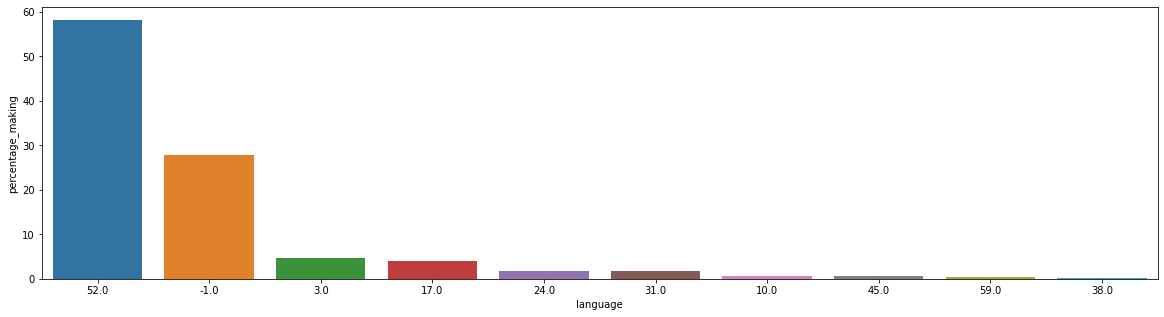

In [14]:
_, ax = plt.subplots(figsize=(20, 5))
sns.barplot(x=song_language_data['language'], y=song_language_data['percentage_making'], ax=ax)

Nearly 60% of the songs are of the language having language id 52.

### Artist Bias?
We will now check whether our dataset is filled by too many songs sung by a particular artist or not.

In [15]:
query = """
    select 
        artist_name,
        (
            cast(count(*) as float) / (select count(*) from songs_dataset) * 100
        ) as percentage_songs
    from songs_dataset
    group by artist_name
    order by percentage_songs DESC
"""
song_artist_data = pdsql.sqldf(query)

In [16]:
song_artist_data.head()

,artist_name,percentage_songs
0,Various Artists,6.354341
1,証聲音樂圖書館 ECHO MUSIC,0.491047
2,Billy Vaughn,0.210249
3,รวมศิลปิน,0.193004
4,Richard Clayderman,0.182030


6% of the songs are made by various artists but we can't say whether there is an "Artist" bias i.e. We can't say that the songs are biased towards a particular artist.

### User artist relationship
Let's see whether users like a particular artist or not

In [17]:
query = """
    select
        msno, 
        SD.artist_name
    from train_dataset TD
    inner join songs_dataset SD 
        on SD.song_id = TD.song_id
"""
user_artist_data = pdsql.sqldf(query)

In [18]:
user_artist_data.head()

,msno,artist_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,Bastille
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,Various Artists
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,Nas
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,Soundway
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,Brett Young


In [20]:
artist_group = user_artist_data.groupby('artist_name')
total_users = members_dataset['msno'].nunique()
artist_names = []
perc_distinct = []
total_distinct = []
for name, details in artist_group:
    total = details['msno'].nunique()
    artist_names.append(name)
    total_distinct.append(total)
    perc_distinct.append(float(total) / total_users * 100)
artist_user_data = pd.DataFrame({
                                    'artist_name': artist_names, 
                                    'percentage_users': perc_distinct, 
                                    'total_users': total_distinct
                                })

In [21]:
artist_user_data = artist_user_data.sort_values('percentage_users', ascending=False)
artist_user_data.reset_index(drop=True, inplace=True)
display(artist_user_data.head(20))
display(artist_user_data.tail(20))

,artist_name,percentage_users,total_users
0,Various Artists,64.692033,22256
1,田馥甄 (Hebe),54.562102,18771
2,周杰倫 (Jay Chou),54.434206,18727
3,五月天 (Mayday),52.852949,18183
4,林俊傑 (JJ Lin),49.879371,17160
5,陳奕迅 (Eason Chan),47.350522,16290
6,G.E.M.鄧紫棋,46.693602,16064
7,Eric 周興哲,45.554167,15672
8,謝和弦 (R-chord),44.510653,15313
9,aMEI (張惠妹),44.092085,15169


,artist_name,percentage_users,total_users
40562,Marc Streitenfeld,0.002907,1
40563,Marc Robillard,0.002907,1
40564,Marc Reift,0.002907,1
40565,Marc Moosbrugger,0.002907,1
40566,Marc Mercs,0.002907,1
40567,Marc Hemmeler| Ray Brown,0.002907,1
40568,Marc Goone,0.002907,1
40569,Marc Cohn,0.002907,1
40570,Marc Bolan,0.002907,1
40571,Marble Sounds,0.002907,1


We know that there are many songs in our database sung by various artists. And hence it is highly possible that there are a lot of different genres available for the songs where various artists are involved.

Let's analyse the top 2 artists. 
We will see that what songs they create, what's the length distribution of those songs, what's the average retention rate (target rate determined by target variable) for all the songs sung by those artist.

### Genre Analysis for the artists 田馥甄 (Hebe) and 周杰倫 (Jay Chou)

In [22]:
hebe_query = """
    select *
    from songs_dataset
    where artist_name = "田馥甄 (Hebe)"
"""
jay_query = """
    select *
    from songs_dataset
    where artist_name = "周杰倫 (Jay Chou)"
"""
hebe_data = pdsql.sqldf(hebe_query)
jay_data = pdsql.sqldf(jay_query)

In [23]:
genre_dict_hebe = {}
for genre_ids in hebe_data['genre_ids']:
    genres = str(genre_ids).split('|')
    for genre in genres:
        if genre_dict_hebe.get(genre, False):
            genre_dict_hebe[genre] += 1
        else:
            genre_dict_hebe[genre] = 1
genres_hebe = []
totals_hebe = []
for genre, val in genre_dict_hebe.items():
    genres_hebe.append(genre)
    totals_hebe.append(val)
    
genre_dict_jay = {}
for genre_ids in jay_data['genre_ids']:
    genres = str(genre_ids).split('|')
    for genre in genres:
        if genre_dict_jay.get(genre, False):
            genre_dict_jay[genre] += 1
        else:
            genre_dict_jay[genre] = 1
genres_jay = []
totals_jay = []
for genre, val in genre_dict_jay.items():
    genres_jay.append(genre)
    totals_jay.append(val)

In [24]:
hebe_genre_data = pd.DataFrame({'genre_id': genres_hebe, 'total_songs': totals_hebe})
hebe_genre_data.sort_values('total_songs', inplace=True)
jay_genre_data = pd.DataFrame({'genre_id': genres_jay, 'total_songs': totals_jay})
jay_genre_data.sort_values('total_songs', inplace=True)

<AxesSubplot:title={'center':'Jay songs'}, xlabel='genre_id', ylabel='total_songs'>

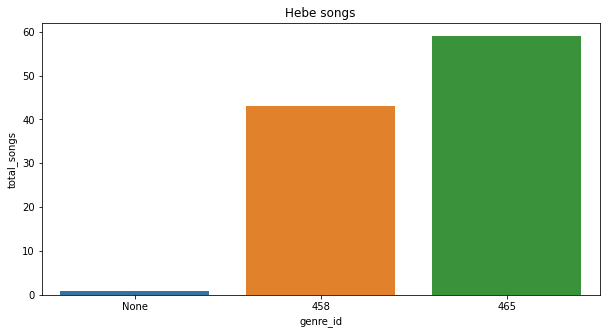

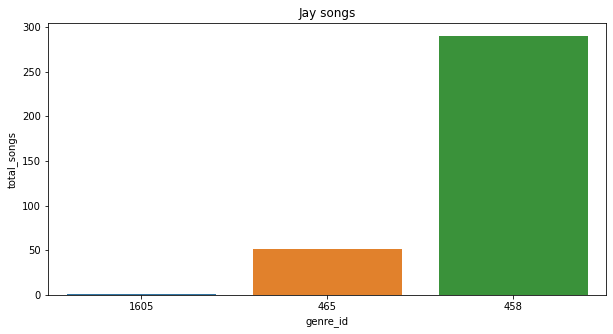

In [25]:
_, ax1 = plt.subplots(figsize=(10, 5))
ax1.set(title='Hebe songs')
sns.barplot(x='genre_id', y='total_songs', data=hebe_genre_data, ax=ax1)
_, ax2 = plt.subplots(figsize=(10, 5))
ax2.set(title='Jay songs')
sns.barplot(x='genre_id', y='total_songs', data=jay_genre_data, ax=ax2)

Hebe has the most songs based on genre 465 which, as seen before, is the most targeted genre for our dataset.

Where as in contrast, Jay has more songs as compared to Hebe (see y scale), and has mainly targeted the genre 458 which is "not very popular" in terms of number of songs.

I'd like to analyse Jay more and check for whether 458 is the genre that people like to listen or not.

But before going deep into this, lets check for the languages these characters have sung in.

### Language analysis for the above artists

In [26]:
hebe_query = """
    select language, count(*) as total_songs
    from hebe_data
    group by language
    order by total_songs DESC
"""
jay_query = """
    select language, count(*) as total_songs
    from jay_data
    group by language
    order by total_songs DESC
"""
hebe_language = pdsql.sqldf(hebe_query)
jay_language = pdsql.sqldf(jay_query)

In [27]:
display(hebe_language)
display(jay_language)

,language,total_songs
0,3.0,103


,language,total_songs
0,3.0,342


This is really interesting because 3 is the language id for which less than 10% of total songs are made.

And the point which makes it interesting is that these two artist are the top 2 popular solo artists.